In [1]:
import sys
import pickle
import numpy as np
import tensorflow as tf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from preprocessing import get_nn_data
from lstm import build_model, make_pred
from plots_lstm import plot_loss, plot_comp 
from sklearn.metrics import mean_squared_error as mse 

## Neural network model 

Parameters of the models (constants for all cities in this case):

In [2]:
END_TRAIN_DATE = '2021-12-26'
END_DATE = '2023-07-02'

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
BATCH_SIZE = 1
EPOCHS =100
HIDDEN = 8
l1 = 1e-6
l2 = 1e-6
lr = 0.0001

Training the models without clusters:

Compilation Time :  0.0035169124603271484
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                   

2023-09-12 06:17:15.136801: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


116/116 [==============================] - 6s 16ms/step - loss: 0.0199 - accuracy: 0.3153 - mape: 346408.1250 - mse: 0.0295 - val_loss: 0.0199 - val_accuracy: 0.3226 - val_mape: 671950.3125 - val_mse: 0.0293
Epoch 2/100
116/116 [==============================] - 1s 8ms/step - loss: 0.0177 - accuracy: 0.2959 - mape: 1575994.3750 - mse: 0.0270 - val_loss: 0.0174 - val_accuracy: 0.2710 - val_mape: 1859962.0000 - val_mse: 0.0264
Epoch 3/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0155 - accuracy: 0.3110 - mape: 2945305.7500 - mse: 0.0243 - val_loss: 0.0155 - val_accuracy: 0.2903 - val_mape: 3076103.2500 - val_mse: 0.0239
Epoch 4/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0140 - accuracy: 0.2786 - mape: 4351137.5000 - mse: 0.0223 - val_loss: 0.0143 - val_accuracy: 0.2968 - val_mape: 4370492.0000 - val_mse: 0.0223
Epoch 5/100
116/116 [==============================] - 1s 7ms/step - loss: 0.0140 - accuracy: 0.2829 - mape: 5872421.0000 - mse: 

116/116 [==============================] - 1s 5ms/step - loss: 0.0041 - accuracy: 0.2570 - mape: 1420430.3750 - mse: 0.0066 - val_loss: 0.0044 - val_accuracy: 0.2000 - val_mape: 1446245.2500 - val_mse: 0.0069
Epoch 39/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 0.2937 - mape: 1362695.0000 - mse: 0.0064 - val_loss: 0.0048 - val_accuracy: 0.2710 - val_mape: 1799668.8750 - val_mse: 0.0080
Epoch 40/100
116/116 [==============================] - 1s 5ms/step - loss: 0.0039 - accuracy: 0.2851 - mape: 1632637.6250 - mse: 0.0061 - val_loss: 0.0049 - val_accuracy: 0.2645 - val_mape: 1830968.3750 - val_mse: 0.0081
Epoch 41/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0036 - accuracy: 0.2743 - mape: 1151251.2500 - mse: 0.0057 - val_loss: 0.0049 - val_accuracy: 0.2452 - val_mape: 1565255.0000 - val_mse: 0.0081
Epoch 42/100
116/116 [==============================] - 1s 5ms/step - loss: 0.0039 - accuracy: 0.2873 - mape: 1445383.0000 - 

116/116 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.2829 - mape: 1361441.8750 - mse: 0.0042 - val_loss: 0.0041 - val_accuracy: 0.2194 - val_mape: 1119233.6250 - val_mse: 0.0066
Epoch 76/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.2743 - mape: 1625263.2500 - mse: 0.0059 - val_loss: 0.0041 - val_accuracy: 0.2710 - val_mape: 1173651.2500 - val_mse: 0.0067
Epoch 77/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 0.2549 - mape: 1268723.2500 - mse: 0.0057 - val_loss: 0.0043 - val_accuracy: 0.2387 - val_mape: 1216485.6250 - val_mse: 0.0072
Epoch 78/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 0.2743 - mape: 1116135.3750 - mse: 0.0057 - val_loss: 0.0045 - val_accuracy: 0.2516 - val_mape: 1412981.3750 - val_mse: 0.0075
Epoch 79/100
116/116 [==============================] - 1s 5ms/step - loss: 0.0034 - accuracy: 0.2786 - mape: 1570032.2500 - 

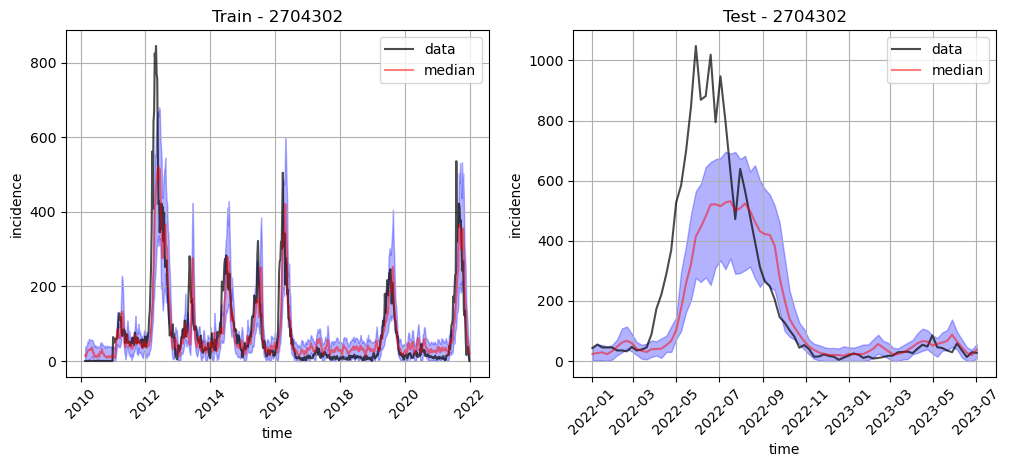

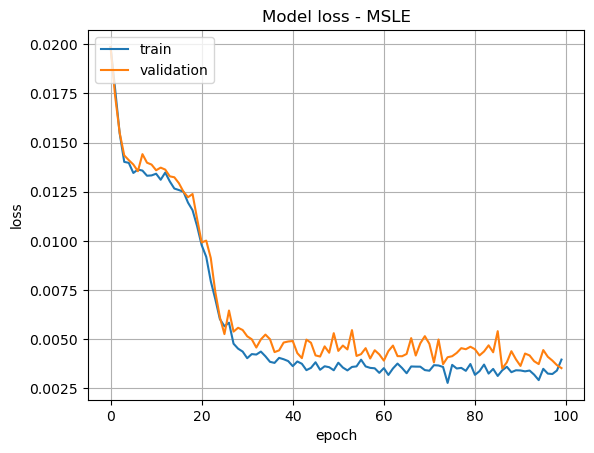

Compilation Time :  0.0020220279693603516
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                 

Epoch 31/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.2289 - mape: 3002547.7500 - mse: 0.0096 - val_loss: 0.0040 - val_accuracy: 0.1935 - val_mape: 2489015.5000 - val_mse: 0.0053
Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.2289 - mape: 2969266.7500 - mse: 0.0097 - val_loss: 0.0040 - val_accuracy: 0.1806 - val_mape: 2176027.2500 - val_mse: 0.0056
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0056 - accuracy: 0.2225 - mape: 3198640.5000 - mse: 0.0091 - val_loss: 0.0032 - val_accuracy: 0.2129 - val_mape: 2082206.5000 - val_mse: 0.0042
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0054 - accuracy: 0.2354 - mape: 2851990.0000 - mse: 0.0087 - val_loss: 0.0039 - val_accuracy: 0.2258 - val_mape: 2394424.7500 - val_mse: 0.0054
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0054 - accuracy: 0.2549 - mape: 27

Epoch 68/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.2376 - mape: 3510982.7500 - mse: 0.0090 - val_loss: 0.0033 - val_accuracy: 0.1806 - val_mape: 2484053.0000 - val_mse: 0.0046
Epoch 69/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.2462 - mape: 3019178.2500 - mse: 0.0089 - val_loss: 0.0034 - val_accuracy: 0.2774 - val_mape: 3027952.0000 - val_mse: 0.0048
Epoch 70/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.2700 - mape: 3173282.5000 - mse: 0.0090 - val_loss: 0.0038 - val_accuracy: 0.2710 - val_mape: 2708663.0000 - val_mse: 0.0055
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.2268 - mape: 3567687.5000 - mse: 0.0076 - val_loss: 0.0031 - val_accuracy: 0.2194 - val_mape: 2896773.2500 - val_mse: 0.0042
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0051 - accuracy: 0.2354 - mape: 31

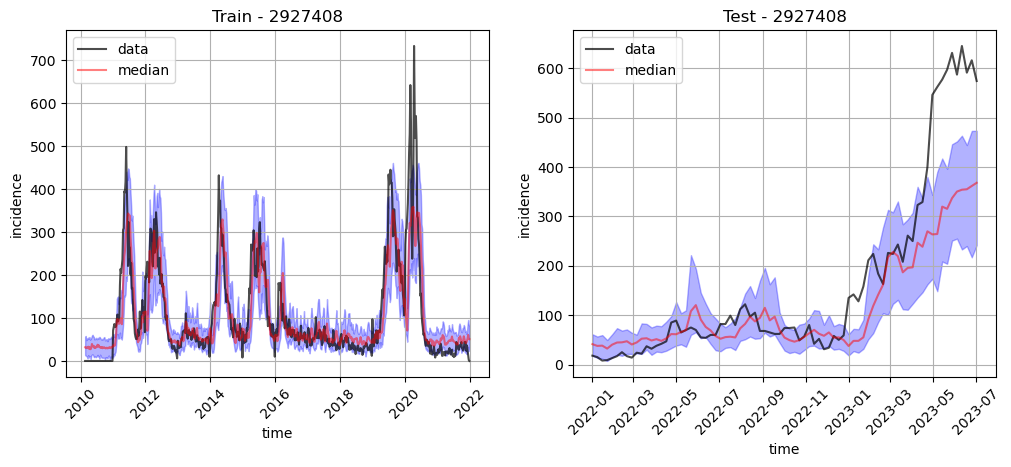

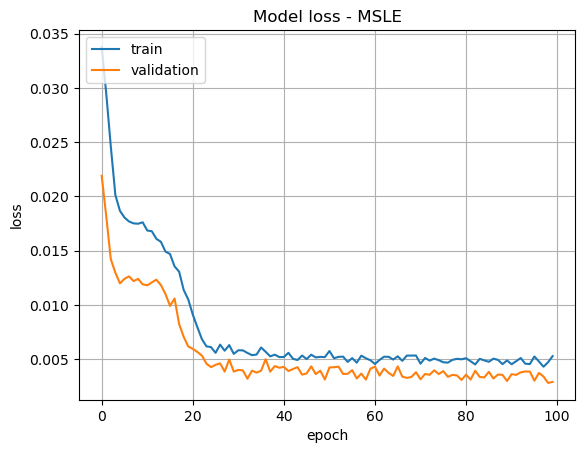

Compilation Time :  0.0020799636840820312
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                 

116/116 [==============================] - 1s 6ms/step - loss: 0.0042 - accuracy: 0.2181 - mape: 230536.0938 - mse: 0.0062 - val_loss: 0.0049 - val_accuracy: 0.2258 - val_mape: 251760.5469 - val_mse: 0.0084
Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0039 - accuracy: 0.2765 - mape: 304257.3125 - mse: 0.0057 - val_loss: 0.0046 - val_accuracy: 0.2065 - val_mape: 233674.8594 - val_mse: 0.0078
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.2721 - mape: 260571.7344 - mse: 0.0060 - val_loss: 0.0036 - val_accuracy: 0.2387 - val_mape: 355361.9688 - val_mse: 0.0059
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 0.2354 - mape: 283377.9062 - mse: 0.0050 - val_loss: 0.0031 - val_accuracy: 0.1935 - val_mape: 327951.4688 - val_mse: 0.0050
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.2397 - mape: 314186.0312 - mse: 0.00

116/116 [==============================] - 1s 6ms/step - loss: 0.0027 - accuracy: 0.2743 - mape: 319190.9375 - mse: 0.0038 - val_loss: 0.0031 - val_accuracy: 0.2323 - val_mape: 365868.9375 - val_mse: 0.0048
Epoch 69/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0030 - accuracy: 0.2873 - mape: 307928.2500 - mse: 0.0043 - val_loss: 0.0028 - val_accuracy: 0.2774 - val_mape: 498772.9062 - val_mse: 0.0044
Epoch 70/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0033 - accuracy: 0.2808 - mape: 282929.7188 - mse: 0.0048 - val_loss: 0.0036 - val_accuracy: 0.2581 - val_mape: 409955.7812 - val_mse: 0.0059
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0031 - accuracy: 0.2851 - mape: 267542.3750 - mse: 0.0044 - val_loss: 0.0029 - val_accuracy: 0.2645 - val_mape: 358730.0312 - val_mse: 0.0046
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0036 - accuracy: 0.2657 - mape: 299322.6562 - mse: 0.00

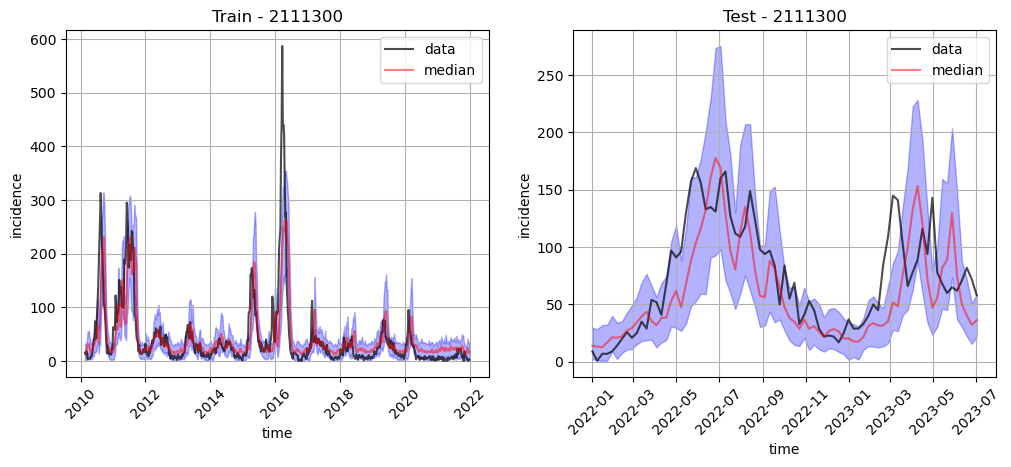

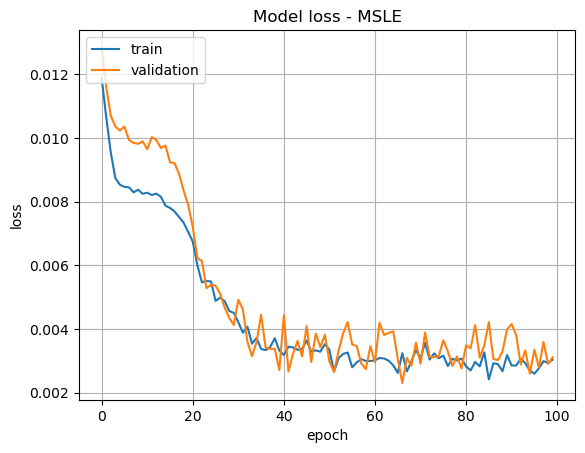

Compilation Time :  0.00199127197265625
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                   

Epoch 31/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.2333 - mape: 798791.0625 - mse: 0.0080 - val_loss: 0.0041 - val_accuracy: 0.2710 - val_mape: 743480.7500 - val_mse: 0.0059
Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0047 - accuracy: 0.2354 - mape: 606785.9375 - mse: 0.0079 - val_loss: 0.0044 - val_accuracy: 0.1677 - val_mape: 415541.5625 - val_mse: 0.0065
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.2549 - mape: 643916.5000 - mse: 0.0075 - val_loss: 0.0052 - val_accuracy: 0.2194 - val_mape: 652328.4375 - val_mse: 0.0073
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.2052 - mape: 855092.7500 - mse: 0.0073 - val_loss: 0.0054 - val_accuracy: 0.2516 - val_mape: 185790.5625 - val_mse: 0.0082
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0051 - accuracy: 0.2527 - mape: 766870.125

116/116 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.2289 - mape: 898898.2500 - mse: 0.0059 - val_loss: 0.0040 - val_accuracy: 0.2000 - val_mape: 659552.1875 - val_mse: 0.0058
Epoch 69/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.2441 - mape: 904716.1875 - mse: 0.0059 - val_loss: 0.0034 - val_accuracy: 0.2323 - val_mape: 722642.8125 - val_mse: 0.0047
Epoch 70/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.2246 - mape: 881234.3125 - mse: 0.0060 - val_loss: 0.0042 - val_accuracy: 0.2129 - val_mape: 164639.4375 - val_mse: 0.0061
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.2657 - mape: 866184.7500 - mse: 0.0068 - val_loss: 0.0037 - val_accuracy: 0.2774 - val_mape: 598511.6875 - val_mse: 0.0054
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 0.2786 - mape: 998288.4375 - mse: 0.00

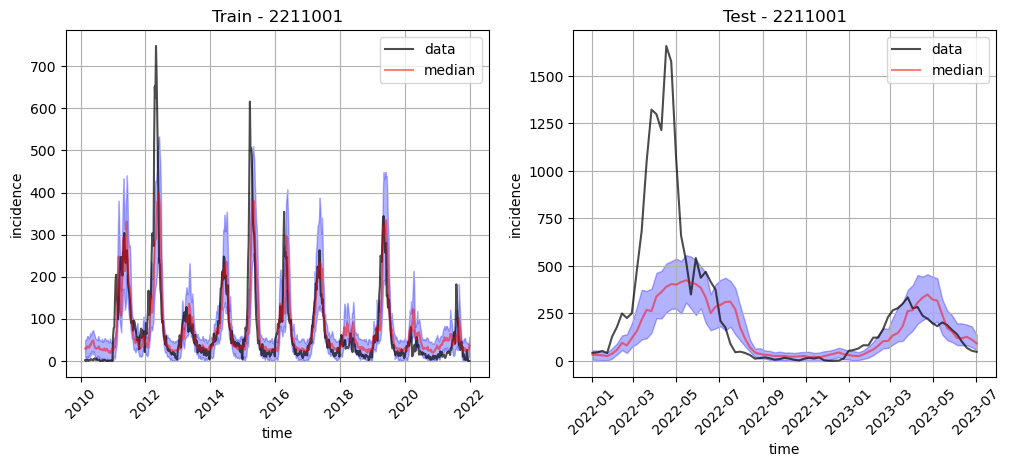

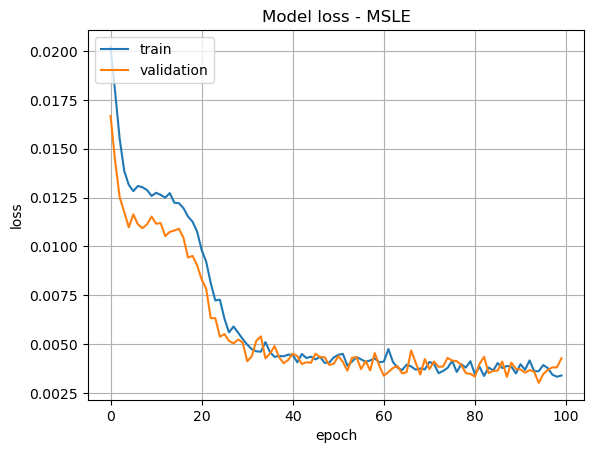

Compilation Time :  0.0020301342010498047
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                 

Epoch 31/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0057 - accuracy: 0.2246 - mape: 1850745.7500 - mse: 0.0096 - val_loss: 0.0050 - val_accuracy: 0.2000 - val_mape: 1300734.7500 - val_mse: 0.0078
Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0059 - accuracy: 0.2570 - mape: 1748430.8750 - mse: 0.0099 - val_loss: 0.0050 - val_accuracy: 0.2065 - val_mape: 1542851.2500 - val_mse: 0.0079
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0054 - accuracy: 0.2829 - mape: 1439403.3750 - mse: 0.0092 - val_loss: 0.0048 - val_accuracy: 0.1935 - val_mape: 1933106.0000 - val_mse: 0.0074
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0055 - accuracy: 0.2657 - mape: 1964089.2500 - mse: 0.0092 - val_loss: 0.0055 - val_accuracy: 0.1548 - val_mape: 1480095.8750 - val_mse: 0.0089
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0056 - accuracy: 0.2592 - mape: 23

Epoch 68/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0052 - accuracy: 0.3002 - mape: 1872202.6250 - mse: 0.0087 - val_loss: 0.0050 - val_accuracy: 0.2387 - val_mape: 1771045.7500 - val_mse: 0.0079
Epoch 69/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0051 - accuracy: 0.2916 - mape: 2106783.0000 - mse: 0.0087 - val_loss: 0.0037 - val_accuracy: 0.2065 - val_mape: 1044576.0000 - val_mse: 0.0056
Epoch 70/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.2765 - mape: 1780055.2500 - mse: 0.0090 - val_loss: 0.0045 - val_accuracy: 0.1742 - val_mape: 1733841.3750 - val_mse: 0.0072
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.2873 - mape: 1795118.0000 - mse: 0.0083 - val_loss: 0.0046 - val_accuracy: 0.2129 - val_mape: 772126.0625 - val_mse: 0.0072
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.2808 - mape: 185

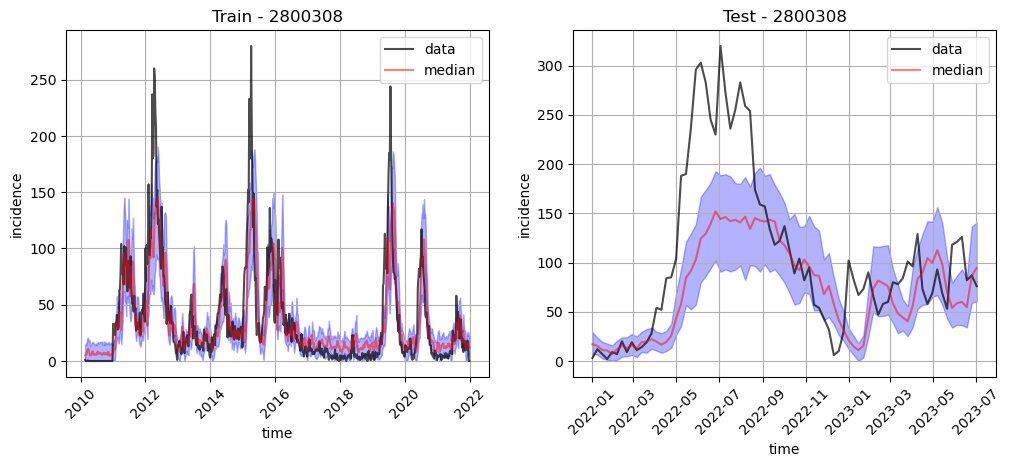

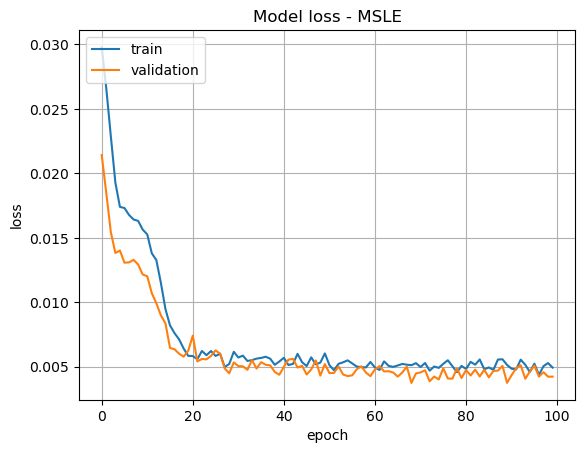

Compilation Time :  0.002012014389038086
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                  

Epoch 31/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.2441 - mape: 2026781.5000 - mse: 0.0084 - val_loss: 0.0029 - val_accuracy: 0.2258 - val_mape: 1495405.6250 - val_mse: 0.0035
Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.2613 - mape: 1619025.7500 - mse: 0.0079 - val_loss: 0.0029 - val_accuracy: 0.1935 - val_mape: 1683804.6250 - val_mse: 0.0035
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.2592 - mape: 1691542.1250 - mse: 0.0064 - val_loss: 0.0034 - val_accuracy: 0.2258 - val_mape: 1546936.8750 - val_mse: 0.0044
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0047 - accuracy: 0.2549 - mape: 1858648.2500 - mse: 0.0073 - val_loss: 0.0031 - val_accuracy: 0.2129 - val_mape: 1499178.6250 - val_mse: 0.0040
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.2289 - mape: 14

Epoch 68/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0039 - accuracy: 0.2721 - mape: 1936583.0000 - mse: 0.0060 - val_loss: 0.0031 - val_accuracy: 0.2645 - val_mape: 1854953.5000 - val_mse: 0.0042
Epoch 69/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.2592 - mape: 2101072.2500 - mse: 0.0065 - val_loss: 0.0038 - val_accuracy: 0.2452 - val_mape: 2171640.7500 - val_mse: 0.0055
Epoch 70/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 0.2786 - mape: 2004040.3750 - mse: 0.0071 - val_loss: 0.0031 - val_accuracy: 0.2323 - val_mape: 1406197.0000 - val_mse: 0.0041
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 0.2786 - mape: 2185518.2500 - mse: 0.0069 - val_loss: 0.0031 - val_accuracy: 0.2323 - val_mape: 1685351.8750 - val_mse: 0.0042
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0039 - accuracy: 0.2678 - mape: 21

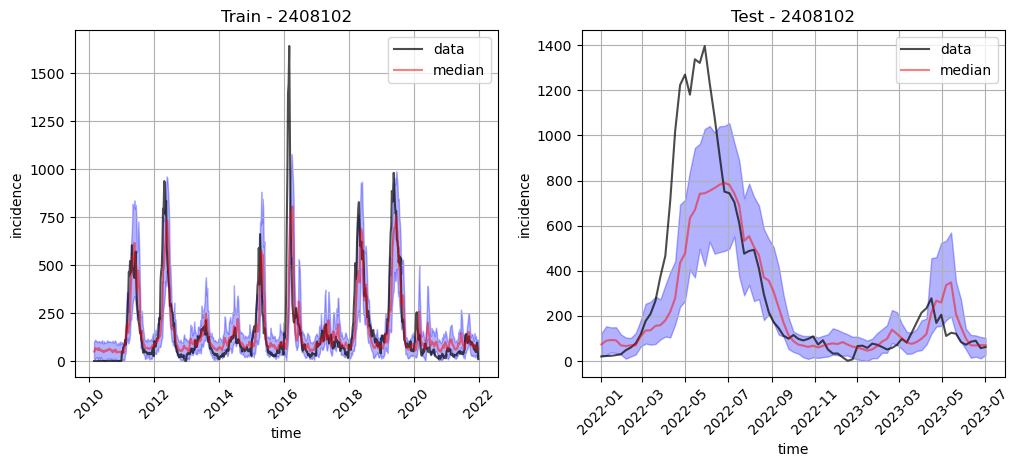

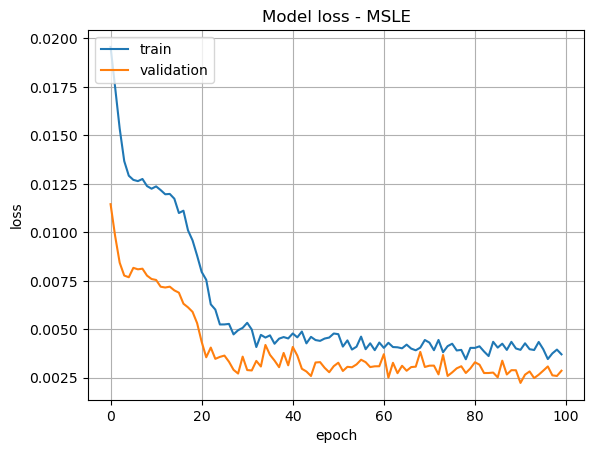

Compilation Time :  0.0019559860229492188
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                 

Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.2419 - mape: 97.0859 - mse: 0.0063 - val_loss: 0.0047 - val_accuracy: 0.2516 - val_mape: 125.6624 - val_mse: 0.0070
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0045 - accuracy: 0.2268 - mape: 104.7055 - mse: 0.0070 - val_loss: 0.0041 - val_accuracy: 0.2387 - val_mape: 98.4097 - val_mse: 0.0062
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 0.2592 - mape: 97.7472 - mse: 0.0068 - val_loss: 0.0049 - val_accuracy: 0.2129 - val_mape: 106.3213 - val_mse: 0.0073
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0047 - accuracy: 0.2808 - mape: 100.9290 - mse: 0.0076 - val_loss: 0.0050 - val_accuracy: 0.3419 - val_mape: 102.5629 - val_mse: 0.0076
Epoch 36/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 0.2592 - mape: 105.3814 - mse: 0.0066 - val_loss: 0.

116/116 [==============================] - 1s 6ms/step - loss: 0.0039 - accuracy: 0.2981 - mape: 93.5787 - mse: 0.0062 - val_loss: 0.0036 - val_accuracy: 0.2774 - val_mape: 103.3954 - val_mse: 0.0053
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0032 - accuracy: 0.2959 - mape: 92.0124 - mse: 0.0051 - val_loss: 0.0043 - val_accuracy: 0.2903 - val_mape: 95.1373 - val_mse: 0.0066
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0033 - accuracy: 0.2894 - mape: 88.5278 - mse: 0.0052 - val_loss: 0.0044 - val_accuracy: 0.2581 - val_mape: 86.0486 - val_mse: 0.0068
Epoch 73/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0030 - accuracy: 0.3024 - mape: 89.8406 - mse: 0.0047 - val_loss: 0.0037 - val_accuracy: 0.2839 - val_mape: 94.8571 - val_mse: 0.0056
Epoch 74/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.3132 - mape: 82.2915 - mse: 0.0064 - val_loss: 0.0040 - val_accurac

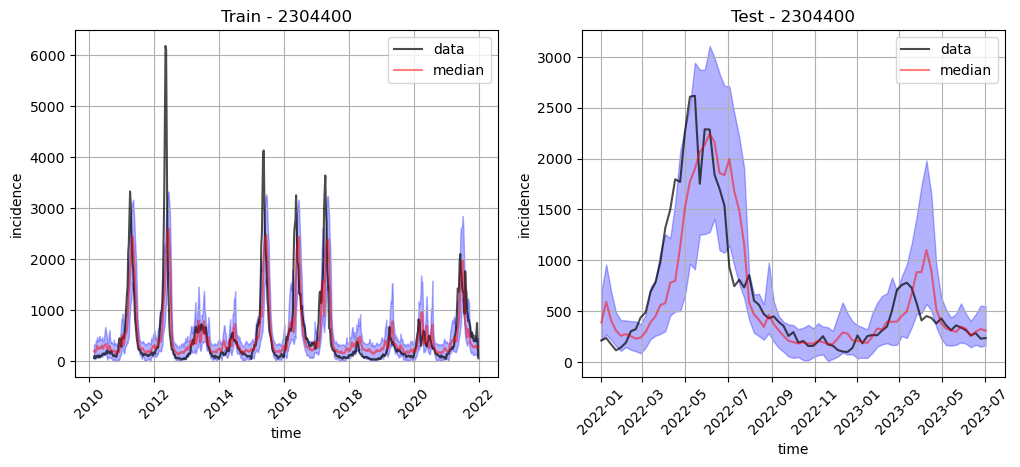

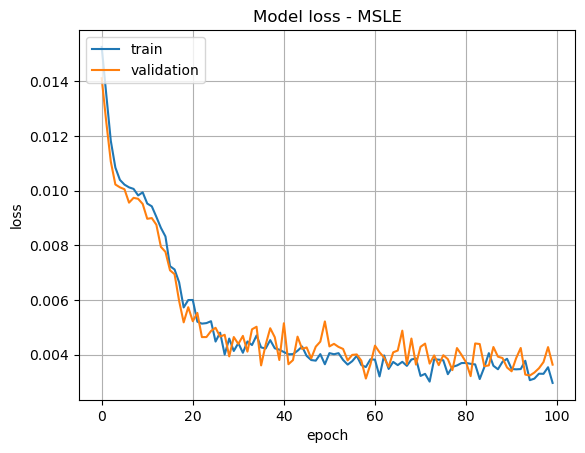

Compilation Time :  0.0019528865814208984
Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                 

Epoch 31/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0048 - accuracy: 0.2117 - mape: 1650890.6250 - mse: 0.0074 - val_loss: 0.0060 - val_accuracy: 0.2710 - val_mape: 1924894.3750 - val_mse: 0.0110
Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0048 - accuracy: 0.3024 - mape: 1783495.3750 - mse: 0.0077 - val_loss: 0.0066 - val_accuracy: 0.2581 - val_mape: 731839.5625 - val_mse: 0.0120
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.2851 - mape: 1490434.2500 - mse: 0.0080 - val_loss: 0.0052 - val_accuracy: 0.2581 - val_mape: 1207852.0000 - val_mse: 0.0091
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0051 - accuracy: 0.3002 - mape: 1004893.5625 - mse: 0.0082 - val_loss: 0.0073 - val_accuracy: 0.2839 - val_mape: 548692.8750 - val_mse: 0.0132
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0047 - accuracy: 0.2808 - mape: 1766

Epoch 68/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0040 - accuracy: 0.2721 - mape: 1933985.3750 - mse: 0.0063 - val_loss: 0.0051 - val_accuracy: 0.2645 - val_mape: 1557326.6250 - val_mse: 0.0092
Epoch 69/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.2916 - mape: 1615457.7500 - mse: 0.0060 - val_loss: 0.0044 - val_accuracy: 0.2645 - val_mape: 2243655.2500 - val_mse: 0.0080
Epoch 70/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.2549 - mape: 1503620.5000 - mse: 0.0058 - val_loss: 0.0047 - val_accuracy: 0.2129 - val_mape: 1943197.8750 - val_mse: 0.0085
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.2786 - mape: 1928537.3750 - mse: 0.0058 - val_loss: 0.0049 - val_accuracy: 0.3097 - val_mape: 1294853.6250 - val_mse: 0.0089
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.2851 - mape: 22

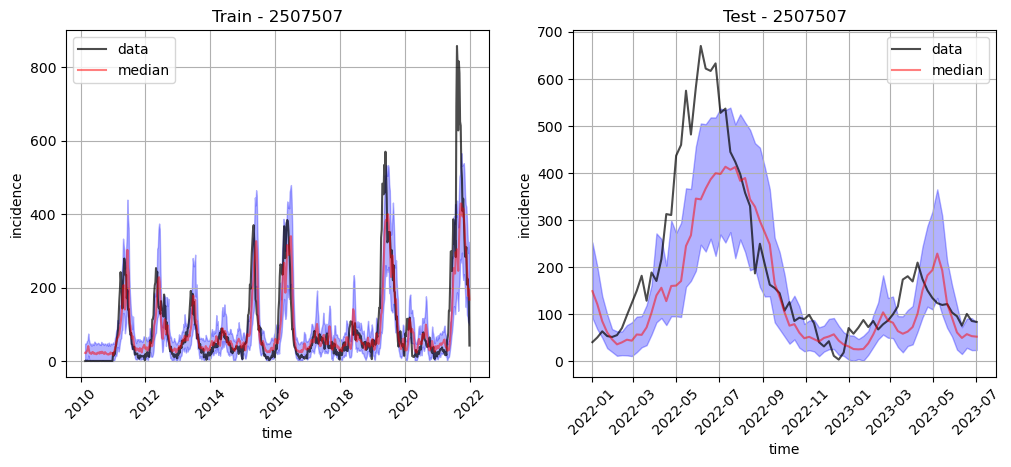

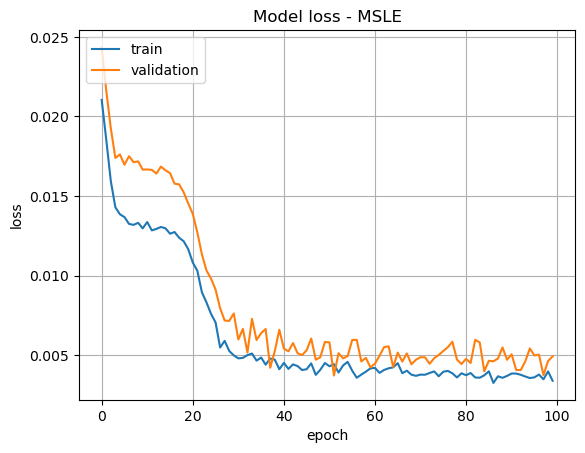

Compilation Time :  0.00191497802734375
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 4, 16)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1600      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                   

Epoch 31/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0049 - accuracy: 0.2268 - mape: 1420658.8750 - mse: 0.0084 - val_loss: 0.0045 - val_accuracy: 0.2581 - val_mape: 1623228.6250 - val_mse: 0.0069
Epoch 32/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0054 - accuracy: 0.2181 - mape: 1955423.2500 - mse: 0.0094 - val_loss: 0.0048 - val_accuracy: 0.3226 - val_mape: 1247377.7500 - val_mse: 0.0072
Epoch 33/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0053 - accuracy: 0.2678 - mape: 1427550.6250 - mse: 0.0096 - val_loss: 0.0046 - val_accuracy: 0.2645 - val_mape: 1612194.3750 - val_mse: 0.0069
Epoch 34/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0047 - accuracy: 0.2700 - mape: 1429270.1250 - mse: 0.0082 - val_loss: 0.0051 - val_accuracy: 0.2581 - val_mape: 1031757.0000 - val_mse: 0.0078
Epoch 35/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0062 - accuracy: 0.2592 - mape: 17

Epoch 68/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.2786 - mape: 1410930.0000 - mse: 0.0084 - val_loss: 0.0037 - val_accuracy: 0.3161 - val_mape: 1418454.3750 - val_mse: 0.0058
Epoch 69/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.2635 - mape: 1819837.2500 - mse: 0.0085 - val_loss: 0.0050 - val_accuracy: 0.2839 - val_mape: 975480.6875 - val_mse: 0.0079
Epoch 70/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.2527 - mape: 1647156.6250 - mse: 0.0074 - val_loss: 0.0040 - val_accuracy: 0.2839 - val_mape: 1626058.3750 - val_mse: 0.0061
Epoch 71/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0048 - accuracy: 0.2549 - mape: 1906597.3750 - mse: 0.0086 - val_loss: 0.0053 - val_accuracy: 0.2839 - val_mape: 1429978.8750 - val_mse: 0.0086
Epoch 72/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0043 - accuracy: 0.2829 - mape: 149

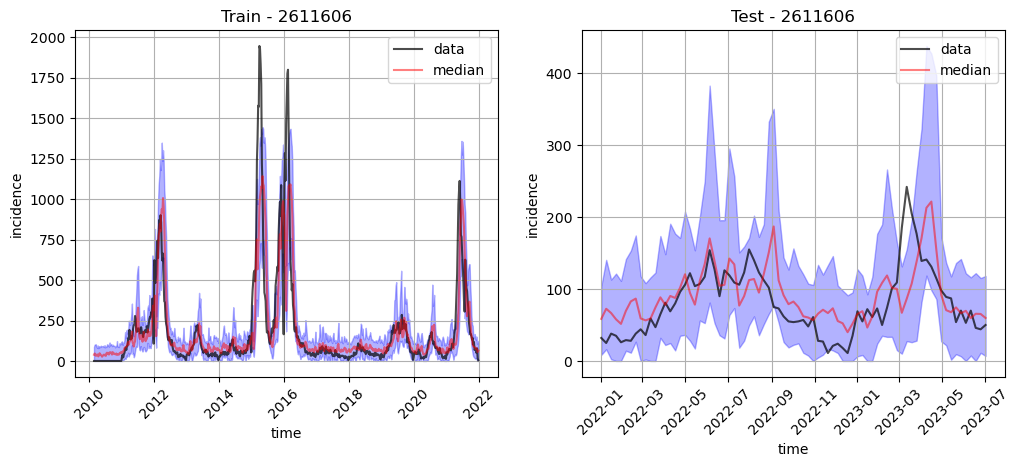

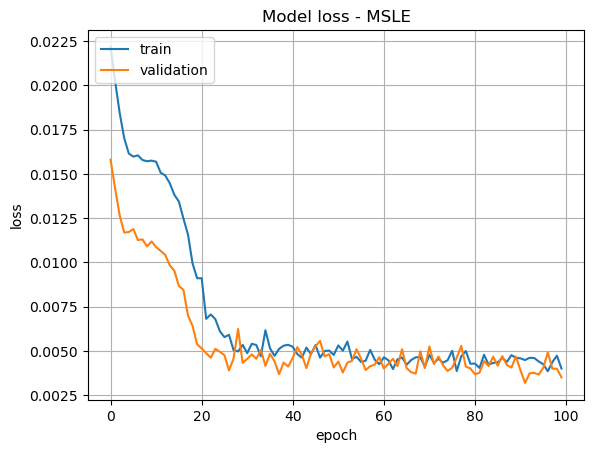

CPU times: user 18min 51s, sys: 59.6 s, total: 19min 51s
Wall time: 18min 3s


In [3]:
%%time

for CITY in [2704302, 2927408, 2111300, 2211001,
            2800308, 2408102, 2304400, 2507507, 2611606]:
    FILENAME_DATA = f'../../data_single/dengue_{CITY}.csv'
    df = pd.read_csv(FILENAME_DATA)
    cols_to_drop = df.columns[df.columns.str.contains('est')]
    df.drop(cols_to_drop, axis=1, inplace=True)
    FEAT = df.shape[1]

    model = build_model(l1=l1, l2 = l2, hidden = HIDDEN, features = FEAT, 
                        predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=BATCH_SIZE, loss = 'msle', lr = lr)


    m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, 
                                                               doenca = 'dengue', epochs = EPOCHS, 
                                                               end_train_date = END_TRAIN_DATE, 
                                                               ratio= None, end_date = END_DATE,
                         predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'single',  filename = FILENAME_DATA)
             
    plot_loss(h_msle_all, title = 'Model loss - MSLE')

Training the models with clusters:

Compilation Time :  0.0029668807983398438
Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 4, 160)]          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             10816     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                

/Users/eduardoaraujo/Documents/Github/forecast_models_dengue/models/neuralnetworks/preprocessing.py:136: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/forecast_models_dengue/models/neuralnetworks/preprocessing.py:136: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  norm_df[f'diff_{i}'] = np.concatenate(([np.nan], np.diff(norm_df[f'{i}'], 1)), axis = 0)
/Users/eduardoaraujo/Documents/Github/forecast_models_

116/116 [==============================] - 5s 10ms/step - loss: 0.0301 - accuracy: 0.2873 - mape: 756549.0000 - mse: 0.0434 - val_loss: 0.0212 - val_accuracy: 0.3161 - val_mape: 1368915.2500 - val_mse: 0.0306
Epoch 2/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0258 - accuracy: 0.2592 - mape: 2671202.2500 - mse: 0.0384 - val_loss: 0.0177 - val_accuracy: 0.3032 - val_mape: 3340507.7500 - val_mse: 0.0263
Epoch 3/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0218 - accuracy: 0.2829 - mape: 5253497.0000 - mse: 0.0332 - val_loss: 0.0150 - val_accuracy: 0.3290 - val_mape: 5454779.0000 - val_mse: 0.0227
Epoch 4/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0194 - accuracy: 0.2916 - mape: 7937917.5000 - mse: 0.0298 - val_loss: 0.0146 - val_accuracy: 0.3290 - val_mape: 6987762.0000 - val_mse: 0.0220
Epoch 5/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0186 - accuracy: 0.3002 - mape: 8432338.0000 - mse:

Epoch 38/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.2657 - mape: 3658964.0000 - mse: 0.0088 - val_loss: 0.0061 - val_accuracy: 0.1742 - val_mape: 3231106.0000 - val_mse: 0.0088
Epoch 39/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0057 - accuracy: 0.2549 - mape: 3124365.0000 - mse: 0.0085 - val_loss: 0.0056 - val_accuracy: 0.1871 - val_mape: 3191505.7500 - val_mse: 0.0079
Epoch 40/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.3002 - mape: 3410297.2500 - mse: 0.0088 - val_loss: 0.0054 - val_accuracy: 0.1613 - val_mape: 2754938.7500 - val_mse: 0.0076
Epoch 41/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0064 - accuracy: 0.2808 - mape: 3214727.2500 - mse: 0.0098 - val_loss: 0.0057 - val_accuracy: 0.1613 - val_mape: 3538506.7500 - val_mse: 0.0083
Epoch 42/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0062 - accuracy: 0.2937 - mape: 36

Epoch 75/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.2786 - mape: 3037913.7500 - mse: 0.0074 - val_loss: 0.0052 - val_accuracy: 0.1806 - val_mape: 2639031.7500 - val_mse: 0.0071
Epoch 76/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0058 - accuracy: 0.2570 - mape: 3275985.2500 - mse: 0.0091 - val_loss: 0.0049 - val_accuracy: 0.2065 - val_mape: 3435130.7500 - val_mse: 0.0068
Epoch 77/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0046 - accuracy: 0.3002 - mape: 3336862.2500 - mse: 0.0068 - val_loss: 0.0047 - val_accuracy: 0.1935 - val_mape: 2546056.0000 - val_mse: 0.0065
Epoch 78/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0050 - accuracy: 0.2700 - mape: 3100805.7500 - mse: 0.0073 - val_loss: 0.0051 - val_accuracy: 0.1871 - val_mape: 2514800.5000 - val_mse: 0.0073
Epoch 79/100
116/116 [==============================] - 1s 6ms/step - loss: 0.0049 - accuracy: 0.2981 - mape: 32

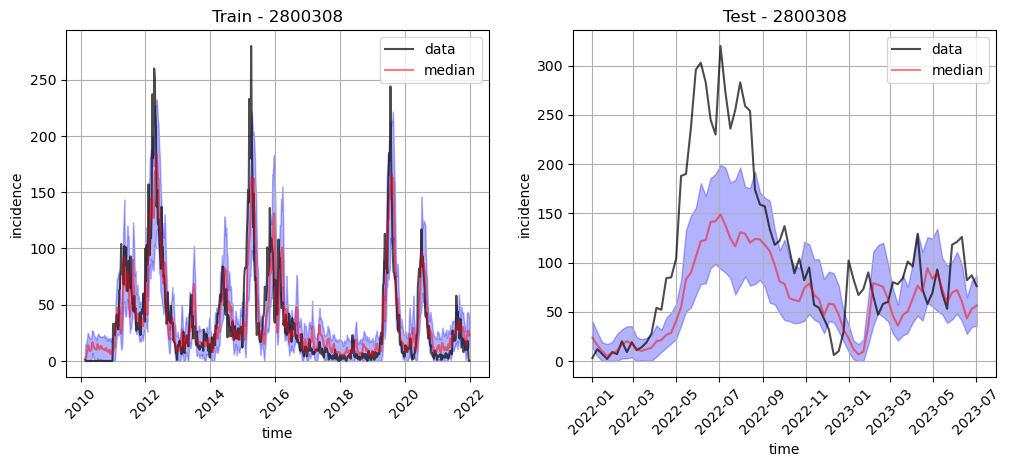

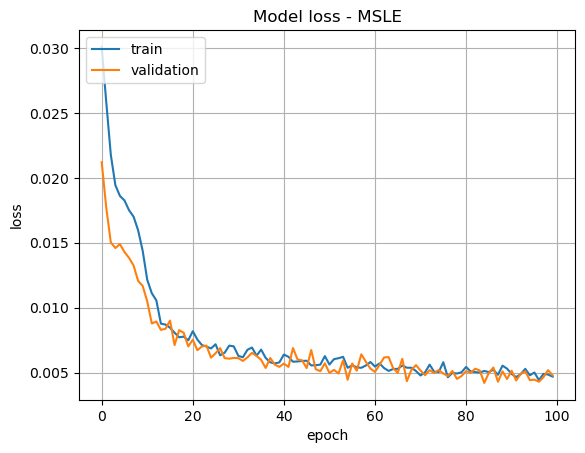

CPU times: user 2min 11s, sys: 7.25 s, total: 2min 18s
Wall time: 2min 7s


In [23]:
%%time

for CITY in [#2704302, 2927408, 2111300, 2211001,
           2800308,
    #2408102, 2304400, 2507507, 2611606
]:
    FILENAME_DATA = f'../../data_cluster/dengue_{CITY}_cluster.csv'
    df = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0')
    cols_to_drop = df.columns[df.columns.str.contains('est')]
    df.drop(cols_to_drop, axis=1, inplace=True)
    FEAT = df.shape[1] + int(df.shape[1]/15)

    model = build_model(l1=l1, l2 = l2, hidden = HIDDEN, features = FEAT, 
                        predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=BATCH_SIZE, loss = 'msle', lr = lr)


    m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, 
                                                               doenca = 'dengue', epochs = EPOCHS, 
                                                               end_train_date = END_TRAIN_DATE, 
                                                               ratio= None, end_date = END_DATE,
                         predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'cluster',  filename = FILENAME_DATA)
             
    plot_loss(h_msle_all, title = 'Model loss - MSLE')

In [18]:
FEAT/15 

5.0

In [14]:
df

,Unnamed: 0,casos_2706901,p_rt1_2706901,p_inc100k_2706901,temp_min_2706901,temp_max_2706901,umid_min_2706901,umid_max_2706901,pressao_min_2706901,pressao_max_2706901,...,temp_mean_2704708,temp_amp_2704708,umid_mean_2704708,umid_amp_2704708,pressao_mean_2704708,temp_mean_2706901,temp_amp_2706901,umid_mean_2706901,umid_amp_2706901,pressao_mean_2706901
0,2010-01-03,0,0.0,0.0,23.243426,30.731119,58.403387,92.764301,0.996563,0.999656,...,26.740716,5.074380,78.697045,23.534511,0.001432,26.987272,7.487693,75.583844,34.360914,0.001546
1,2010-01-10,0,0.0,0.0,22.718528,29.729462,60.428801,94.379109,0.997562,1.000521,...,26.281372,4.937787,78.753077,24.061665,0.001368,26.223995,7.010934,77.403955,33.950309,0.001480
2,2010-01-17,0,0.0,0.0,23.473445,29.950378,63.142331,92.945156,0.999280,1.001885,...,26.687496,4.120893,78.942116,19.309293,0.001314,26.711912,6.476933,78.043743,29.802825,0.001303
3,2010-01-24,0,0.0,0.0,22.793130,29.034228,63.135725,94.143465,0.998248,1.001041,...,26.156560,3.942383,79.177267,20.267396,0.001280,25.913679,6.241098,78.639595,31.007740,0.001397
4,2010-01-31,0,0.0,0.0,23.506461,29.957458,64.494062,93.447655,0.997053,0.999738,...,26.615574,4.446716,80.525417,19.630618,0.001269,26.731960,6.450997,78.970858,28.953593,0.001342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2023-06-25,0,0.0,0.0,21.602020,25.487217,83.321414,96.259927,1.002922,1.005464,...,24.007943,2.797790,88.306811,12.275830,0.001242,23.544619,3.885197,89.790670,12.938513,0.001271
703,2023-07-02,0,0.0,0.0,21.217407,25.196285,83.943311,96.985047,1.002348,1.005189,...,23.960658,2.622829,88.645684,8.819527,0.001393,23.206846,3.978877,90.464179,13.041736,0.001420
704,2023-07-09,0,0.0,0.0,21.072518,25.290366,80.947271,96.371511,1.002777,1.005659,...,23.837960,2.856192,86.266161,11.512054,0.001420,23.181442,4.217848,88.659391,15.424241,0.001441
705,2023-07-16,0,0.0,0.0,20.876269,27.303707,71.119947,97.379286,1.000961,1.004292,...,24.499749,4.648163,83.820369,18.535142,0.001578,24.089988,6.427438,84.249616,26.259339,0.001666


In [4]:
df.columns

Index(['Unnamed: 0', 'casos_2111300', 'p_rt1_2111300', 'p_inc100k_2111300',
       'temp_min_2111300', 'temp_mean_2111300', 'temp_max_2111300',
       'temp_amp_2111300', 'umid_min_2111300', 'umid_max_2111300',
       'umid_mean_2111300', 'umid_amp_2111300', 'pressao_min_2111300',
       'pressao_max_2111300', 'pressao_mean_2111300', 'precip_tot_2111300'],
      dtype='object')

In [5]:
FEAT = 21 # number of features

In [6]:
df_dengue = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0')
df_dengue.index = pd.to_datetime(df_dengue.index)
df_dengue

,casos_2111300,casos_est_2111300,casos_est_min_2111300,casos_est_max_2111300,p_rt1_2111300,p_inc100k_2111300,temp_min_2111300,temp_mean_2111300,temp_max_2111300,temp_amp_2111300,umid_min_2111300,umid_max_2111300,umid_mean_2111300,umid_amp_2111300,pressao_min_2111300,pressao_max_2111300,pressao_mean_2111300,precip_tot_2111300
2010-01-03,1,1.0,1,1,0.000000,0.090173,25.238830,26.735835,28.232840,2.994010,74.961436,90.623953,82.792695,15.662517,0.995606,0.998629,0.001512,2.067544
2010-01-10,2,2.0,2,2,0.000000,0.180347,25.648076,27.633493,29.618909,3.970834,67.957086,88.045838,78.001462,20.088752,0.995492,0.998114,0.001311,0.536169
2010-01-17,2,2.0,2,2,0.000000,0.180347,25.783949,27.906536,30.029123,4.245174,67.217651,88.520029,77.868840,21.302379,0.996901,0.999502,0.001300,0.865474
2010-01-24,3,3.0,3,3,0.000000,0.270520,25.543932,27.801516,30.059100,4.515167,67.599394,89.894783,78.747089,22.295389,0.995660,0.998534,0.001437,1.544121
2010-01-31,8,8.0,8,8,0.000000,0.721387,25.340598,27.111060,28.881522,3.540924,75.213156,91.201240,83.207198,15.988084,0.994496,0.997564,0.001534,3.275783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-25,72,77.0,72,87,0.666981,6.943348,25.013031,27.281954,29.550877,4.537846,66.853608,91.804555,79.329082,24.950947,0.998631,1.001454,0.001411,1.856270
2023-07-02,58,71.0,61,94,0.320690,6.402309,25.635686,27.663720,29.691755,4.056070,67.645075,91.258969,79.452022,23.613894,0.998068,1.001040,0.001486,0.874293
2023-07-09,42,67.0,48,121,0.230748,6.041615,25.811249,27.775303,29.739358,3.928109,68.438736,89.708662,79.073699,21.269926,0.998386,1.001090,0.001352,0.481136
2023-07-16,9,51.0,19,137,0.036049,4.598841,25.814929,27.690181,29.565434,3.750505,69.097032,88.522008,78.809520,19.424976,0.997530,1.000591,0.001530,0.380667


'batch_size': 4, 'l1': 1e-05, 'l2': 1e-05, 'lr': 0.0001}

Let's train the model with the loss function == msle 

{'batch_size': 4, 'l1': 1e-05, 'l2': 0.01, 'lr': 0.0001}

In [7]:
model = build_model(l1=l1, l2 = l2, hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=BATCH_SIZE, loss = 'msle', lr = 0.0001)

m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = END_TRAIN_DATE, 
                    ratio= None, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'msle_all',  filename = FILENAME_DATA)

Compilation Time :  0.0018000602722167969
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 21)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             1920      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 8)              544       
                                                                 
 dropout_2 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                 

ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 4, 21), found shape=(None, 4, 16)


In [ ]:
plot_loss(h_msle_all, title = 'Model loss - MSLE')